<a href="https://www.kaggle.com/code/kusumakar/parkinson-s-disease-eda-and-predictions?scriptVersionId=201456684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease/dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/parkinsons-disease/dataset.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df['status']=df['status'].apply(lambda s:1 if s!=0 else 0)

In [6]:
df['status'].value_counts()

status
1    1147
0      48
Name: count, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

<Axes: >

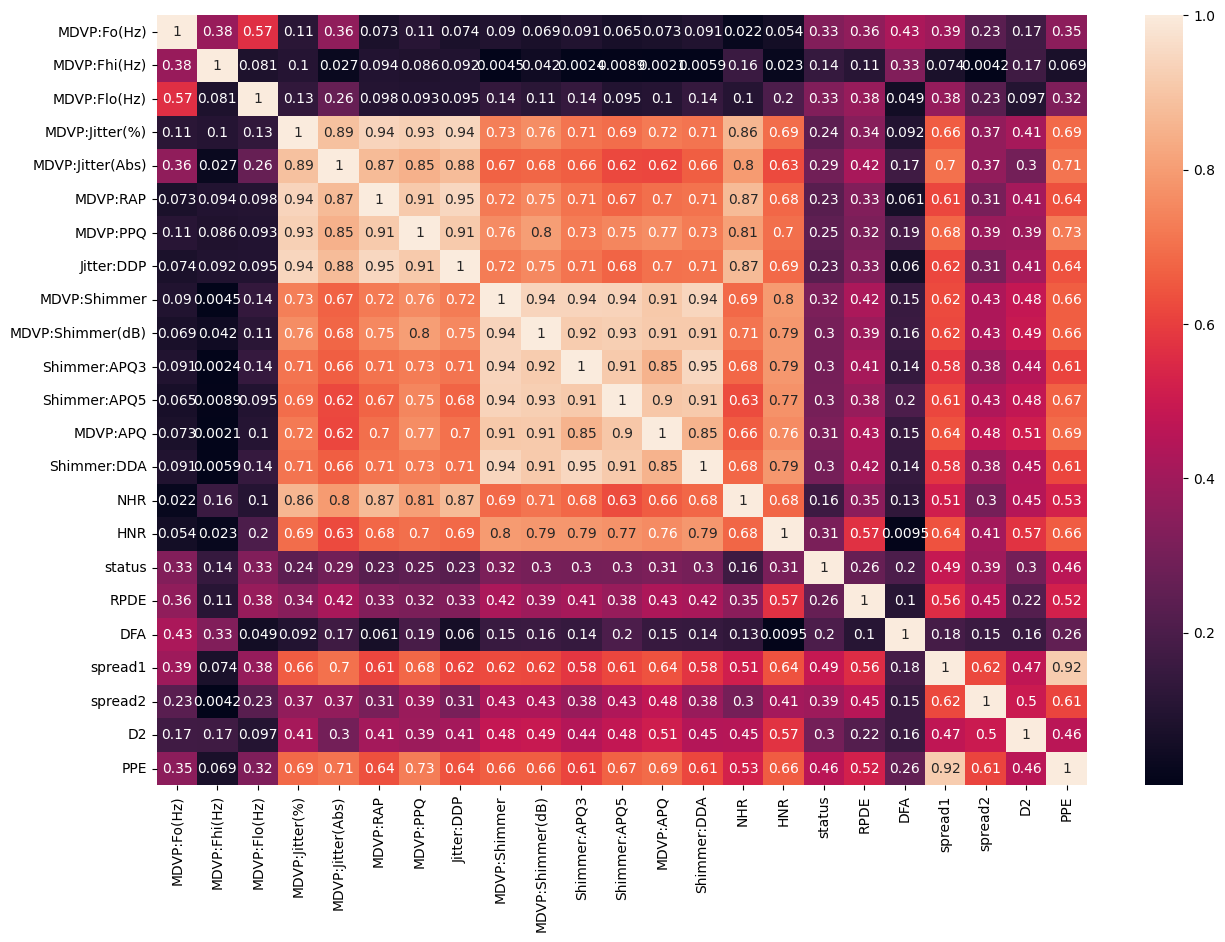

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['name'],axis=1).corr().abs(),annot=True)

In [10]:
corr_matrix =df.drop(columns=['name'],axis=1).corr().abs()

# Define a threshold for high correlation
threshold = 0.9

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]


In [11]:
to_drop

['MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'PPE']

In [12]:
df_new = df.drop(columns=to_drop,axis=1)

<Axes: >

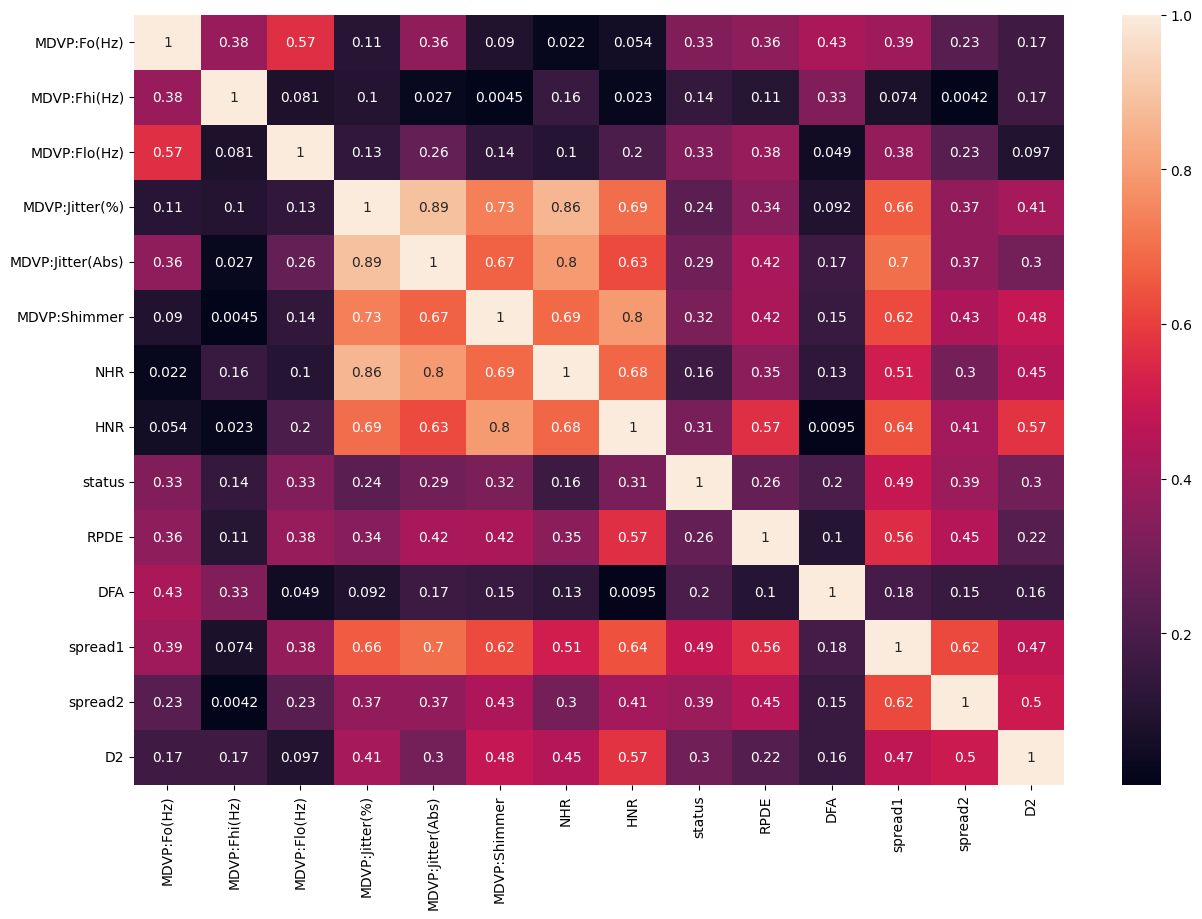

In [13]:
plt.figure(figsize=(15,10))

sns.heatmap(df_new.drop(columns=['name'],axis=1).corr().abs(),annot=True)

In [14]:
df_new.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


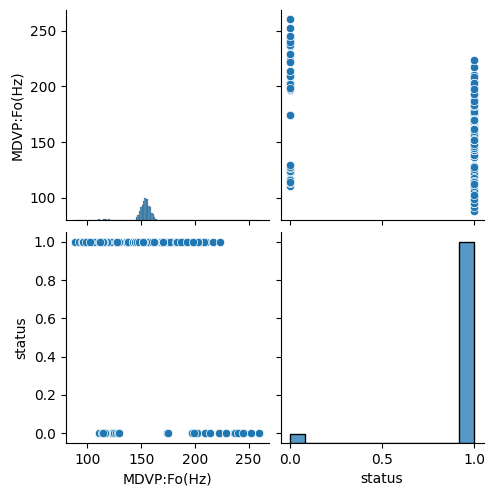

In [15]:
sns.pairplot(df_new[['MDVP:Fo(Hz)','status']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


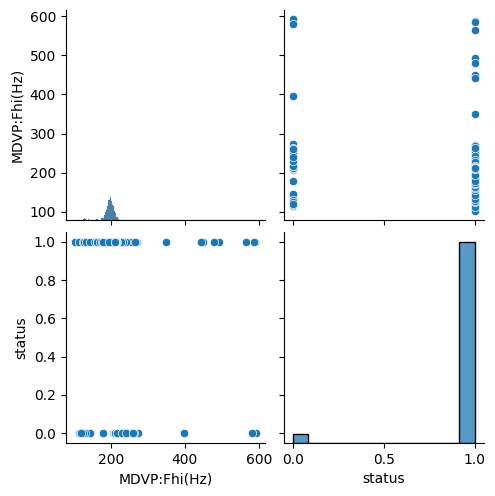

In [16]:
sns.pairplot(df_new[['MDVP:Fhi(Hz)','status']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


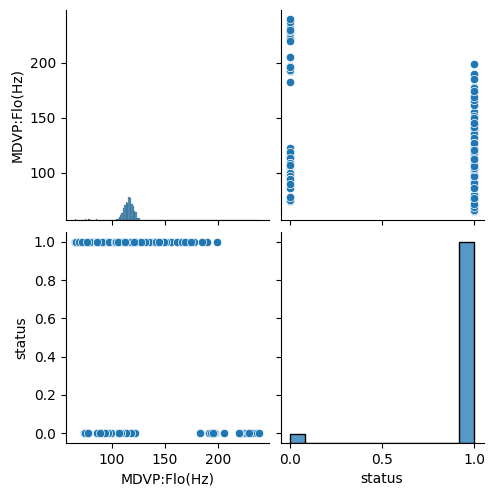

In [17]:
sns.pairplot(df_new[['MDVP:Flo(Hz)','status']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


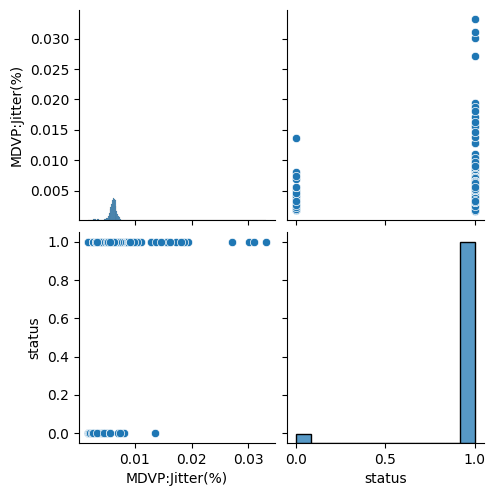

In [18]:
sns.pairplot(df_new[['MDVP:Jitter(%)','status']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


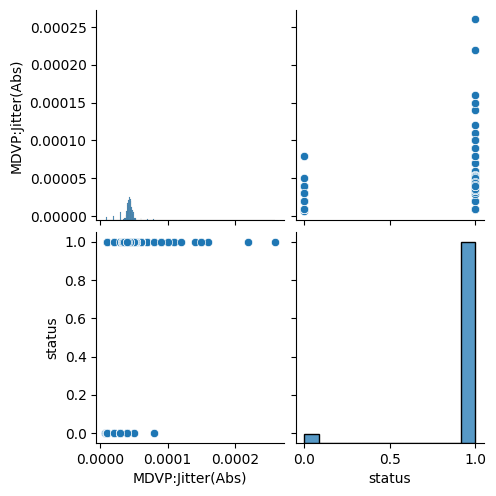

In [19]:
sns.pairplot(df_new[['MDVP:Jitter(Abs)','status']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


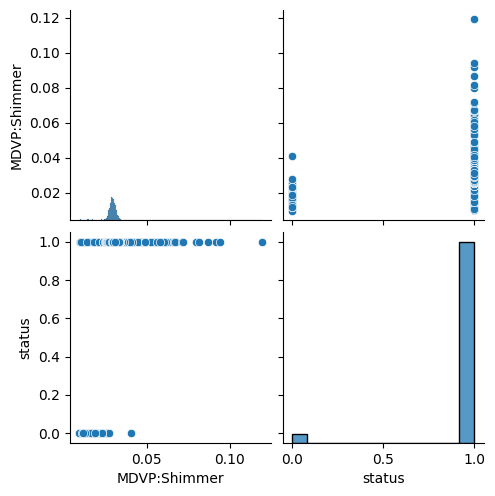

In [20]:
sns.pairplot(df_new[['MDVP:Shimmer','status']])

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
numerical_cols = list(df_new.select_dtypes(include=['float64']).columns)

In [23]:
numerical_cols

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:Shimmer',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2']

In [24]:
transformer = ColumnTransformer([
    ("scaler",StandardScaler(),numerical_cols)
],remainder="passthrough")

In [25]:
X = df_new[numerical_cols]
Y= df_new['status']

In [26]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25)

In [27]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [28]:
Y_train

141     1
184     0
216     1
234     1
483     1
       ..
23      1
1100    1
595     1
281     1
408     1
Name: status, Length: 896, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_upsampled , Y_train_upsampled = smote.fit_resample(X_train_transformed,Y_train)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = {
    
    "randomforest":RandomForestClassifier(),
    "decisionTree":DecisionTreeClassifier(),
    "xgboost":XGBClassifier()
}

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

results =[]

for name,model in models.items():
    accuracies ={}
    model.fit(X_train_upsampled,Y_train_upsampled)
    ypred= model.predict(X_test_transformed)
    accuracies['Model']=name
    accuracies['Accuracy']=accuracy_score(Y_test,ypred)
    accuracies['Confusion Matrix']=confusion_matrix(Y_test,ypred)
    results.append(accuracies)
    
    
    

In [32]:
for i in results:
    print("MODEL -->",i['Model'])
    print("ACCURACY -->",i['Accuracy'])
    print("CONFUSION MATRIX")
    print(i['Confusion Matrix'])

MODEL --> randomforest
ACCURACY --> 0.9899665551839465
CONFUSION MATRIX
[[ 12   2]
 [  1 284]]
MODEL --> decisionTree
ACCURACY --> 0.9765886287625418
CONFUSION MATRIX
[[  8   6]
 [  1 284]]
MODEL --> xgboost
ACCURACY --> 0.979933110367893
CONFUSION MATRIX
[[ 11   3]
 [  3 282]]
